In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# histogram, KDE and densities

In [3]:
# use matplotlib
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

data.head()

,x,y
0,-1.542608,-0.709840
1,0.084075,0.276918
2,-2.665649,-1.881254
3,2.170418,0.652368
4,3.629175,0.396012


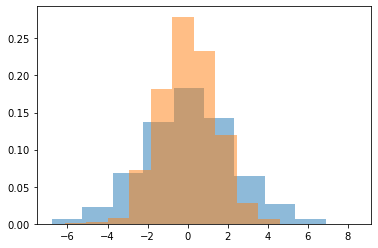

In [4]:
for col in 'xy':
    plt.hist(data[col], density=True, alpha=.5)

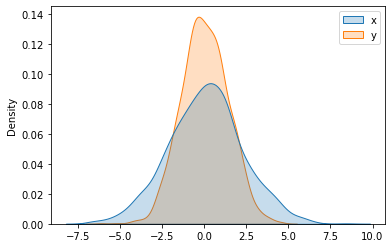

In [5]:
# kernel density estimation
sns.kdeplot(data=data, shade=True);

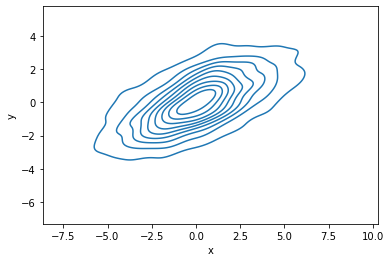

In [6]:
# 2d visualization of the joint density
sns.kdeplot(data=data, x='x', y='y');

In [7]:
# pair plot : useful to explore co-relations between multidimensional data, when you want to plot all 
# pairs of values against each other.

iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


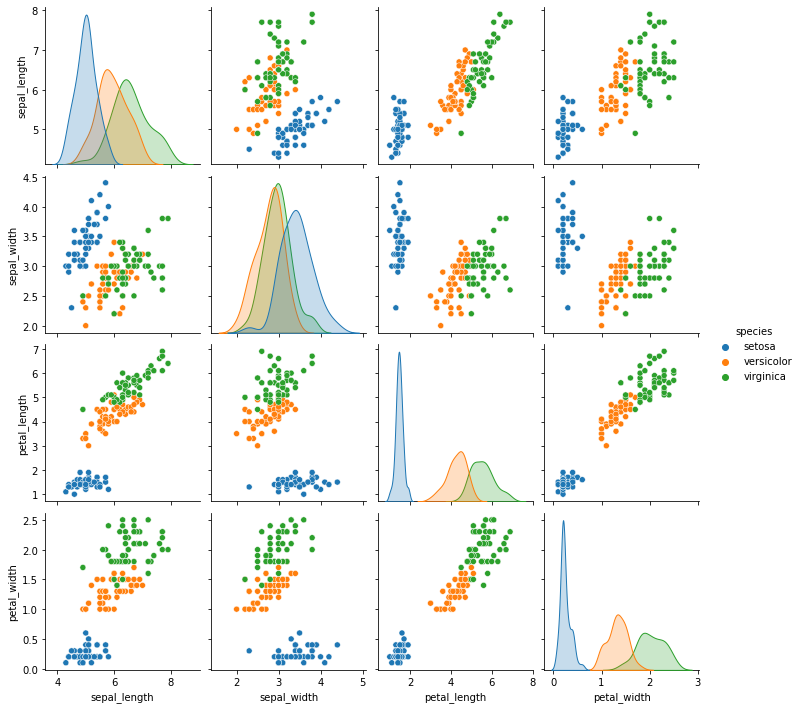

In [8]:
# visualize multidimensional relations 
sns.pairplot(iris, hue='species', height=2.5);

In [9]:
# histogram of subsets : FacetGrid
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
tips['tip_pct'] = 100 * tips['tip']/ tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


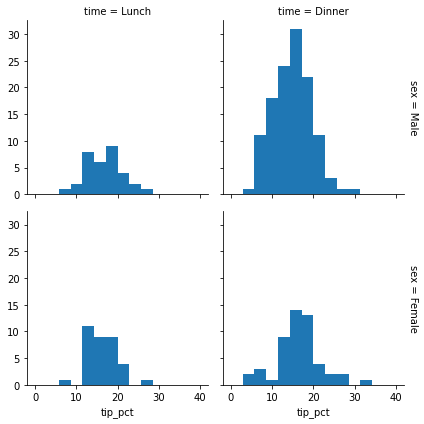

In [11]:
grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15));

'''
insights :
more data on male servers during dinner time
typical tip amount range between 10% - 20%
'''

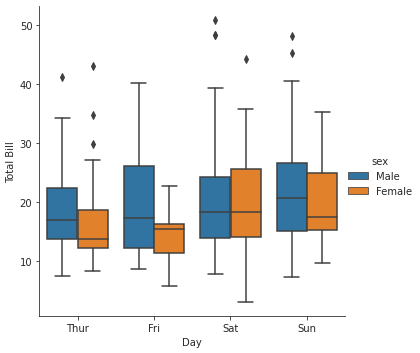

In [13]:
#categorical plot
with sns.axes_style(style='ticks'):
    g = sns.catplot(x='day', y='total_bill', hue='sex', data=tips, kind='box')
    g.set_axis_labels('Day', "Total Bill");
    
'''
Females had a higher toatl bill on Saturday, close to males on Sunday. On Friday, females had very low total bill.
'''

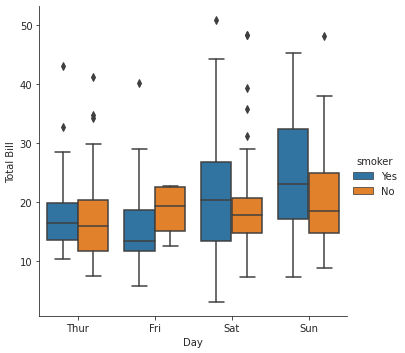

In [17]:
#categorical plot
with sns.axes_style(style='ticks'):
    g = sns.catplot(x='day', y='total_bill', hue='smoker', data=tips, kind='box')
    g.set_axis_labels('Day', "Total Bill");
    
    
'''
People who did not smoke had a higher total bill on Fri.
'''

In [ ]:
#https://ajaytech.co/2020/09/28/8780/

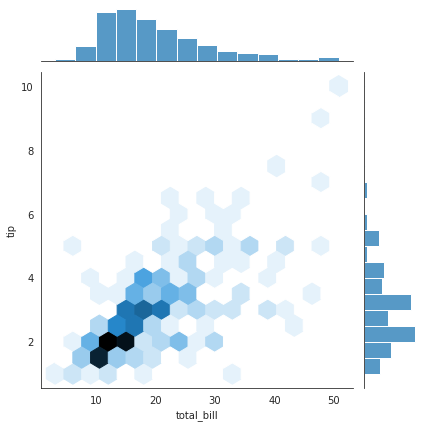

In [15]:
# joint distributions
with sns.axes_style('white'):
    sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
    
'''
One of the drawbacks of scatterplots is Overplotting. When you have large volumes of data to plot, 
scatterplots suffer from overplotting meaning the data points in the plot overlap with each other making 
it difficult to interpret the data. 
Overplotting can be overcome by grouping the values by a range of values. 
This is known as binning. First the entire plot is divided into a grid of bins. We can use grids of different 
shapes such as a triangle, square, hexagon etc., Every bin in the plot represents an interval and it contains 
all the data points within the defined x and y value ranges. The number of points falling into each bin are 
counted and the hexagons are colored based on a color gradient. 
Darker colors indicate that the data points are 
concentrated in that region, while white bins indicate that there is no data.

'''
    

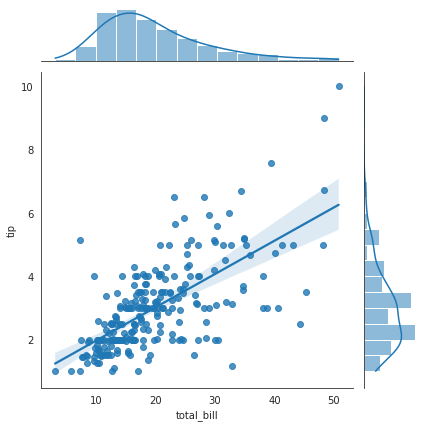

In [18]:
#automatic kernel density estimation and regression
# joint distributions
with sns.axes_style('white'):
    sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')
    
'''

The above plot displays a scatterplot with two histograms at the margins of the graph. 
If you observe the scatterplot, there seems to be a positive relationship between the columns ‘total_bill’ 
and ‘tip’, because if the values of one variable increase so does the other. The strength of the relationship 
appears to be moderate because the points are scattered in the graph. The marginal histograms are both 
right-skewed as most values are concentrated around the left side of the distribution while the right side of 
the distribution is longer. Outliers are the data points that lie far away from the rest of the data values, in 
the graph we can see outliers in the scatterplot as well as the histograms.


A regression line or “line of best fit” gives a visual presentation of the relationship of a dependent variable 
(y axis)
with one or many independent variables (x axis). The line is drawn such that it lies close to all the data points
as much 
as possible. The regression line can be computed using mathematical equations, using this equation we can predict 
the dependent variable for different values of the independent variable. The jointplot() function above is called 
by setting the parameter ‘kind’ to ‘reg’ and so a regression line is drawn on the scatter plot. We can identify 
outliers using the regression line on a scatter plot. The outliers are the points that are farthest from the 
regression line. It can be observed that the scatterplot above has few outliers.

'''

In [19]:
# bar plots
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


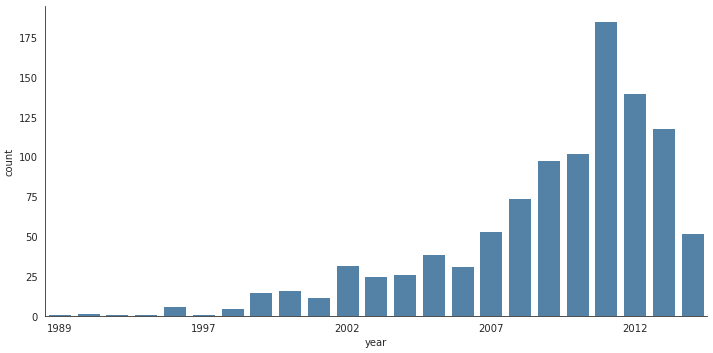

In [20]:
with sns.axes_style('white'):
    g = sns.catplot(x='year', data=planets, aspect=2, kind='count', color='steelblue')
    g.set_xticklabels(step=5)

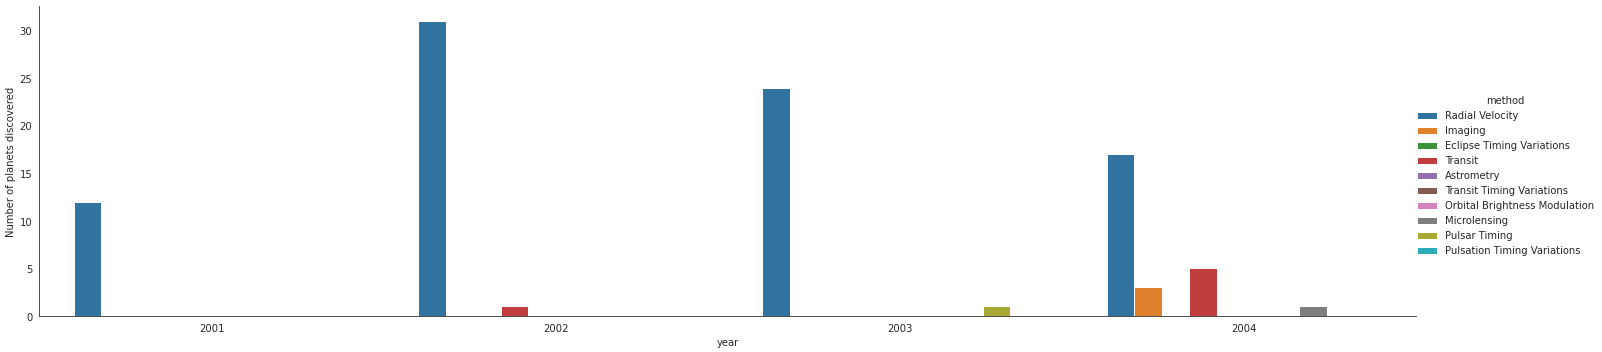

In [22]:
# method of discovery : 
with sns.axes_style('white'):
    g = sns.catplot(x='year', data=planets, aspect=4.0, kind='count', hue='method', order=range(2001, 2005))
    g.set_ylabels('Number of planets discovered')